# Summmary



<p>
Data sets consistings of millions and more observations are exceeding the capacities of a single machine. Based on the Hadoop distributed file system Apache Spark offers a solution for processing large, big data sets by building a virtual machine managing file chunks on distributed worker nodes. The goal here is to apply methods for preparing, cleaning and optimizing data sets. This support a smooth execution with good performance.
</p>

<p>
Some topics and methods explored in this context here are:
</p> 

<ul>
  <li>data frames</li>
  <li>SQL</li>
  <li>conditional queries</li>
  <li>Parquet files</li>
  <li>filtering</li>
  <li>pipelines</li>
  <li>caching</li>
  <li>joining</li>
  <li>shuffling</li>
  <li>UDFs</li>
  <li>indexing</li>
</ul> 

<p>
There are two data sets used here: the Dallas voting decisions data set consisting of string types, and the flight system data sets also with integer.
</p> 

# Import packages

In [2]:
# IPython
from IPython.display import display, HTML, display_html 
#usefull to display wide tables

# base packages
import numpy as np
import pandas as pd
import time
import math
import random
import pathlib
import inspect
from datetime import datetime
from glob import glob
import matplotlib.pyplot as plt



# pyspark
from pyspark.sql import DataFrame
from pyspark.rdd import RDD
# from pyspark.sql.types import *
from pyspark.sql.types import StructType, StructField, IntegerType, \
StringType, BooleanType, DateType, FloatType
from pyspark.sql.functions import lower, col
from pyspark.sql import SparkSession
from pyspark.rdd import RDD
from pyspark.sql.functions import mean, stddev , col, avg, round
from pyspark.sql.types import IntegerType, FloatType
from pyspark.sql.functions import *
import pyspark.sql.functions as F
from pyspark.sql.functions import isnan
from pyspark.sql.functions import broadcast


# machine learning in spark has got different libraries
# for different data objects

# machine learning on dataframes
# is based on pyspark.ml
from pyspark.ml.clustering import KMeans
from pyspark.ml.feature import VectorAssembler

# machine learning on RDDs
# is based pyspark.mllib
from pyspark.mllib.classification import LogisticRegressionWithLBFGS
from pyspark.mllib.clustering import KMeans
from pyspark.mllib.feature import HashingTF
from pyspark.mllib.linalg import Vectors
from pyspark.mllib.regression import LabeledPoint
# pyspark.mllib.classification.SVMModel
from pyspark.mllib.classification import SVMModel, SVMWithSGD
from pyspark.mllib.evaluation import BinaryClassificationMetrics
from pyspark.ml.evaluation import BinaryClassificationEvaluator

# Collaborative Filtering - RDD-based API
# https://spark.apache.org/docs/latest/mllib-collaborative-filtering.html
from pyspark.mllib.recommendation import ALS, MatrixFactorizationModel, Rating

# data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from pyspark_dist_explore import Histogram, hist, distplot, \
pandas_histogram

from handyspark import *

print(pd.show_versions())


INSTALLED VERSIONS
------------------
commit           : None
python           : 3.7.4.final.0
python-bits      : 64
OS               : Windows
OS-release       : 10
machine          : AMD64
processor        : Intel64 Family 6 Model 58 Stepping 9, GenuineIntel
byteorder        : little
LC_ALL           : None
LANG             : None
LOCALE           : None.None

pandas           : 0.25.1
numpy            : 1.16.5
pytz             : 2019.3
dateutil         : 2.8.0
pip              : 19.2.3
setuptools       : 41.4.0
Cython           : 0.29.13
pytest           : 5.2.1
hypothesis       : None
sphinx           : 2.2.0
blosc            : None
feather          : None
xlsxwriter       : 1.2.1
lxml.etree       : 4.4.1
html5lib         : 1.0.1
pymysql          : None
psycopg2         : None
jinja2           : 2.10.3
IPython          : 7.8.0
pandas_datareader: None
bs4              : 4.8.0
bottleneck       : 1.2.1
fastparquet      : None
gcsfs            : None
lxml.etree       : 4.4.1
matplotli

# Inspect working directory

In [3]:
cwd = os.getcwd()
# print(cwd)

cwd_path = pathlib.Path.cwd()
# print(cwd_path)

home_path = pathlib.Path.home()
# print(home_path)

# Spark

### Spark context

In [4]:
print("Spark version: {}".format(sc.version))
print("Python version: {}".format(sc.pythonVer))
print("Spark master: {}".format(sc.master))
# print("Spark user: {}".format(sc.sparkUser))
print("Application name: {}".format(sc.appName))
# print("Application id: {}".format(sc.applicationId))
print("Parllelism: {}".format(sc.defaultParallelism))


Spark version: 3.0.0-preview
Python version: 3.7
Spark master: local[*]
Application name: PySparkShell
Parllelism: 4


### Spark session

<p>
<b>Spark Configuration</b><br>
from pyspark.sql import SparkSession<br>
spark = SparkSession.builder<br>
.appName("Python Spark regression example")<br>
.config("config.option", "value").getOrCreate()<br>
</p> 

### Spark session

In [5]:
# this is for example needed to activate the SQL-api
spark_session = SparkSession.builder.appName("spam_classification").\
getOrCreate()
print(spark_session)
print(spark_session.catalog.currentDatabase())
print(spark_session.catalog.listTables())

default
[]


# Spark

### Spark context

In [6]:
print("Spark version: {}".format(sc.version))
print("Python version: {}".format(sc.pythonVer))
print("Spark master: {}".format(sc.master))
# print("Spark user: {}".format(sc.sparkUser))
print("Application name: {}".format(sc.appName))
# print("Application id: {}".format(sc.applicationId))
print("Parllelism: {}".format(sc.defaultParallelism))


Spark version: 3.0.0-preview
Python version: 3.7
Spark master: local[*]
Application name: PySparkShell
Parllelism: 4


### Spark session

<p>
<b>Spark Configuration</b><br>
from pyspark.sql import SparkSession<br>
spark = SparkSession.builder<br>
.appName("Python Spark regression example")<br>
.config("config.option", "value").getOrCreate()<br>
</p> 

### Spark session

In [7]:
# this is for example needed to activate the SQL-api
spark_session = SparkSession.builder.appName("spam_classification").\
getOrCreate()
print(spark_session)
print(spark_session.catalog.currentDatabase())
print(spark_session.catalog.listTables())

default
[]


# Import data: voting decisions

In [8]:
votingDecisions = \
spark.read.csv(path='data_sets\DallasCouncilVoters.csv',
               sep=',', encoding='UTF-8', header=True, inferSchema=True
              )


Applying a new schema to an existing data frame works by doing the detour over creating a new data frame.

In [9]:
vdSchema = StructType([
    # Define the date field
    StructField('DATE', DateType(), True),
    # Add the title field
    StructField('TITLE', StringType(), True),
    # Add the voter field
    StructField('VOTER_NAME', StringType(), True) 
    ])   
                            
                                
votingDecisions_newSchema = spark.createDataFrame(votingDecisions.rdd, schema=vdSchema)
votingDecisions_newSchema.printSchema()

root
 |-- DATE: date (nullable = true)
 |-- TITLE: string (nullable = true)
 |-- VOTER_NAME: string (nullable = true)



# Explore data

In [10]:
votingDecisions.printSchema()
print(type(votingDecisions))
print("n observations: {}".format(votingDecisions.count()))
print("n columns: {}".format(len(votingDecisions.columns)))

root
 |-- DATE: string (nullable = true)
 |-- TITLE: string (nullable = true)
 |-- VOTER_NAME: string (nullable = true)

<class 'pyspark.sql.dataframe.DataFrame'>
n observations: 44625
n columns: 3


In [11]:
print(votingDecisions.describe().show())

+-------+-----------+--------------------+--------------------+
|summary|       DATE|               TITLE|          VOTER_NAME|
+-------+-----------+--------------------+--------------------+
|  count|      44625|               44430|               44122|
|   mean|       null|                null|                null|
| stddev|       null|                null|                null|
|    min| 01/03/2018|   authorize   an...|   the   final  2...|
|    max|[VICE CHAIR|              Vacant|   Tiffinni A. Young|
+-------+-----------+--------------------+--------------------+

None


## Null-values?

In [12]:
# domain specific data frame language works only on columns
vdTitle_isnull = votingDecisions.filter(votingDecisions.TITLE.isNull())
print(type(vdTitle_isnull))
print(vdTitle_isnull.count())
print(vdTitle_isnull.show(4))

<class 'pyspark.sql.dataframe.DataFrame'>
195
+--------------------+-----+----------+
|                DATE|TITLE|VOTER_NAME|
+--------------------+-----+----------+
|[APPOINTMENT OF J...| null|      null|
|[APPOINTMENT OF J...| null|      null|
|[APPOINTMENT OF J...| null|      null|
|[APPOINTMENT OF J...| null|      null|
+--------------------+-----+----------+
only showing top 4 rows

None


In [13]:
vdVN_isnull = votingDecisions.filter(votingDecisions.VOTER_NAME.isNull())
print(type(vdVN_isnull))
print(vdVN_isnull.count())
print(vdVN_isnull.show(4))

<class 'pyspark.sql.dataframe.DataFrame'>
503
+----------+------+----------+
|      DATE| TITLE|VOTER_NAME|
+----------+------+----------+
|08/15/2018|Vacant|      null|
|08/15/2018|Vacant|      null|
|09/18/2018|Vacant|      null|
|09/12/2018|Vacant|      null|
+----------+------+----------+
only showing top 4 rows

None


In [14]:
# negating isnull for two columns
vd_notNull = votingDecisions.filter(~F.col('TITLE').isNull() | 
                                     F.col('VOTER_NAME').isNull())

print(vd_notNull.count())
print(vd_notNull.show(4))

44625
+----------+-------------+-------------------+
|      DATE|        TITLE|         VOTER_NAME|
+----------+-------------+-------------------+
|02/08/2017|Councilmember|  Jennifer S. Gates|
|02/08/2017|Councilmember| Philip T. Kingston|
|02/08/2017|        Mayor|Michael S. Rawlings|
|02/08/2017|Councilmember|       Adam Medrano|
+----------+-------------+-------------------+
only showing top 4 rows

None


In [15]:
# Handyspark offers a convenient way to determine nulls
votingDecisions_hdf = votingDecisions.toHandy()
print(votingDecisions_hdf.isnull())
print(votingDecisions_hdf.isnull(ratio=True))

DATE            0
TITLE         195
VOTER_NAME    503
Name: missing, dtype: int64
DATE          0.000000
TITLE         0.004370
VOTER_NAME    0.011272
Name: missing(ratio), dtype: float64


In [16]:
votingDecisions_hdf_2 = votingDecisions_hdf.na.drop()
print(votingDecisions_hdf_2.isnull(ratio=True))
print(type(votingDecisions_hdf_2))

DATE          0.0
TITLE         0.0
VOTER_NAME    0.0
Name: missing(ratio), dtype: float64
<class 'handyspark.sql.dataframe.HandyFrame'>


## Value counts

In [17]:
vc_title = votingDecisions_hdf_2.cols['TITLE'].value_counts()
print(type(vc_title))
print(vc_title[5:])

# displaying the full value counts shows that there values 
# which are not names
# for example there is 15 the string value:
# authorize   an   ordinance   approving   and   adopting ...

<class 'pandas.core.series.Series'>
TITLE
Councilmember           35072
Deputy Mayor Pro Tem     2948
Mayor                    2948
Mayor Pro Tem            2944
Name: value_counts, dtype: int64


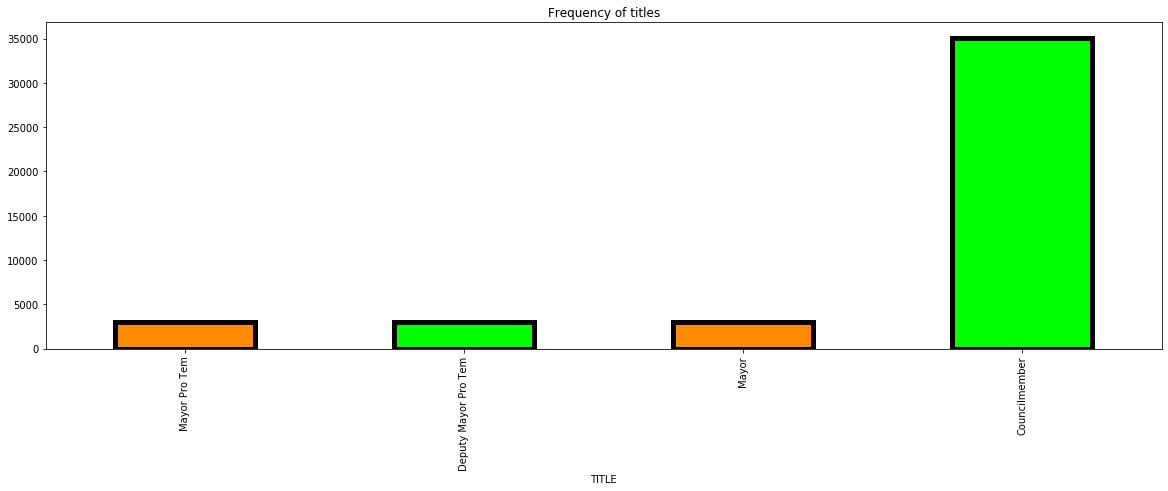

In [18]:
vc_title[5:].sort_values().plot.bar(figsize=(20,6), edgecolor="black", linewidth=5,
                                    color=['darkorange', 'lime'],
                                    title='Frequency of titles')
plt.show()

In [19]:
vc_vn = votingDecisions_hdf_2.cols['VOTER_NAME'].value_counts()
print(type(vc_vn))
print(vc_vn[8:])

# displaying the full value counts shows that there values 
# which are not names
# for example there is 15 the string value:
# the  final  2018 Assessment Plan and the 2018 Assessment ...
# also some index values are not unique

<class 'pandas.core.series.Series'>
VOTER_NAME
Adam Medrano           2948
B. Adam  McGough       2948
Carolyn King Arnold    1172
Casey  Thomas           304
Casey Thomas           2644
Dwaine R. Caraway      1468
Erik Wilson            1172
Jennifer S.  Gates     1773
Jennifer S. Gates      1175
Kevin Felder           1776
Lee Kleinman           1175
Lee M. Kleinman        1773
Mark  Clayton          1773
Mark Clayton           1175
Michael S. Rawlings    2948
Monica R. Alonzo       1172
Omar Narvaez           1776
Philip T.  Kingston    1773
Philip T. Kingston     1175
Rickey D.  Callahan    1773
Rickey D. Callahan     1175
Sandy  Greyson         1773
Sandy Greyson          1175
Scott  Griggs          1773
Scott Griggs           1175
Tennell Atkins         1776
Tiffinni A. Young      1172
Name: value_counts, dtype: int64


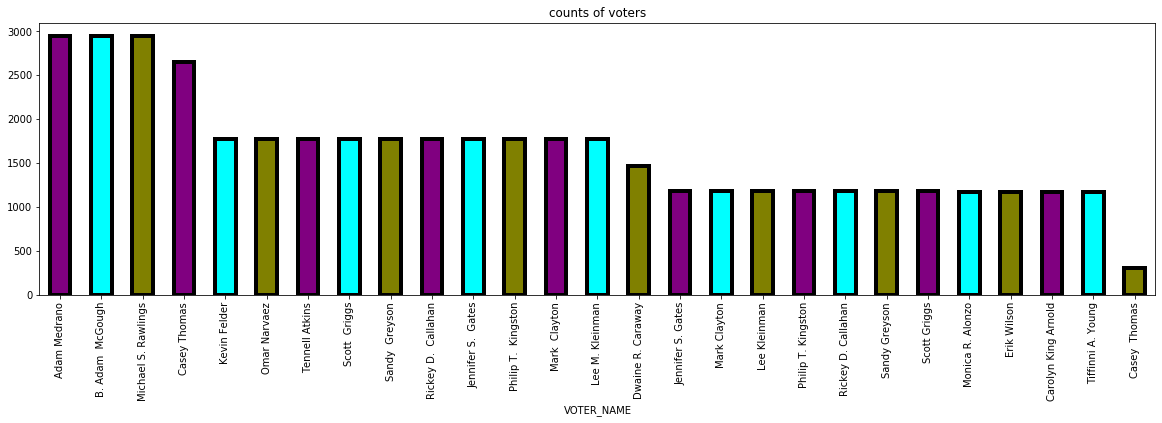

In [20]:
vc_vn[8:].sort_values(ascending=False).plot.bar(figsize=(20,5), 
                                                edgecolor='black', 
                                                linewidth=4, color=['purple', 'cyan', 'olive'],
                                                title="counts of voters")
plt.show()

### Converting a handy frame back to a data frame.

In [21]:
# converting handy frame back to data frame
# https://dvgodoy.github.io/handyspark/_modules/handyspark/sql/dataframe.html

vd_df = votingDecisions_hdf_2.notHandy()
print(type(vd_df))
vd_df.printSchema()

<class 'pyspark.sql.dataframe.DataFrame'>
root
 |-- DATE: string (nullable = true)
 |-- TITLE: string (nullable = true)
 |-- VOTER_NAME: string (nullable = true)



#### Changing column names

In [22]:
# by converting to pandas
vD_pd =votingDecisions_hdf_2.toPandas()
vD_pd.columns = ['date', 'title', 'voter']
print(vD_pd.columns)


INFO: Safety is ON - returning up to 1000 instances.
Index(['date', 'title', 'voter'], dtype='object')


In [23]:
# by using domain specific pyspark
vd_df = vd_df.selectExpr('DATE as date', 
                           'TITLE as title' , 
                           'VOTER_NAME as voter')
vd_df.show(5)

# using the pandas object of HandySpark does not work with rename
# votingDecisions_hdf_2.pandas.rename(columns ={'DATE':'date'})

+----------+-------------+-------------------+
|      date|        title|              voter|
+----------+-------------+-------------------+
|02/08/2017|Councilmember|  Jennifer S. Gates|
|02/08/2017|Councilmember| Philip T. Kingston|
|02/08/2017|        Mayor|Michael S. Rawlings|
|02/08/2017|Councilmember|       Adam Medrano|
|02/08/2017|Councilmember|       Casey Thomas|
+----------+-------------+-------------------+
only showing top 5 rows



In [24]:
# withColumnRenamed('age', 'age2').collect()
# https://spark.apache.org/docs/latest/api/python/pyspark.sql.html?highlight=selectexpr#pyspark.sql.DataFrame.withColumnRenamed

vd_cr = votingDecisions.withColumnRenamed('DATE', 'date').\
withColumnRenamed('TITLE', 'title').withColumnRenamed('VOTER_NAME', 'voter')
vd_cr.show(3)

+----------+-------------+-------------------+
|      date|        title|              voter|
+----------+-------------+-------------------+
|02/08/2017|Councilmember|  Jennifer S. Gates|
|02/08/2017|Councilmember| Philip T. Kingston|
|02/08/2017|        Mayor|Michael S. Rawlings|
+----------+-------------+-------------------+
only showing top 3 rows



# Operations on data frames

with the domain specific Pyspark language.

In [25]:
# distinct VOTER_NAME 
name_dist = vd_df.select('voter').distinct()
print(name_dist.count())
print(name_dist.show(10, truncate=False))
# 35 distinc voter names

35
+-------------------+
|voter              |
+-------------------+
|Jennifer S. Gates  |
|Philip T. Kingston |
|Michael S. Rawlings|
|Adam Medrano       |
|Casey Thomas       |
|Carolyn King Arnold|
|Scott Griggs       |
|B. Adam  McGough   |
|Lee Kleinman       |
|Sandy Greyson      |
+-------------------+
only showing top 10 rows

None


In [26]:
title_disc = vd_df.select('title').distinct()
print(title_disc.count())
display(title_disc.show())
# 2020]"| or authorize an  or... ??

9
+--------------------+
|               title|
+--------------------+
|       Councilmember|
|               Mayor|
|Deputy Mayor Pro Tem|
|       Mayor Pro Tem|
|              2020]"|
| authorize an  or...|
| authorize an  or...|
| authorize an  or...|
|   authorize   an...|
+--------------------+



None

In [27]:
# Filter voter_df where the VOTER_NAME is 1-15 characters in length

vn_len = \
vd_df.filter("length(voter) > 1 and length(voter) < 20")

print(type(vn_len))
print(vd_df.count())
print(vd_df.show(5))

<class 'pyspark.sql.dataframe.DataFrame'>
44122
+----------+-------------+-------------------+
|      date|        title|              voter|
+----------+-------------+-------------------+
|02/08/2017|Councilmember|  Jennifer S. Gates|
|02/08/2017|Councilmember| Philip T. Kingston|
|02/08/2017|        Mayor|Michael S. Rawlings|
|02/08/2017|Councilmember|       Adam Medrano|
|02/08/2017|Councilmember|       Casey Thomas|
+----------+-------------+-------------------+
only showing top 5 rows

None


In [28]:
# ~ negates filter
# filter out voter names with a point
vd_point = vd_df.filter(~ F.col('voter').contains('.') )

print(type(vd_point))
print(vd_point.count())
print(vd_point.show(5))

<class 'pyspark.sql.dataframe.DataFrame'>
23797
+----------+-------------+-------------------+
|      date|        title|              voter|
+----------+-------------+-------------------+
|02/08/2017|Councilmember|       Adam Medrano|
|02/08/2017|Councilmember|       Casey Thomas|
|02/08/2017|Councilmember|Carolyn King Arnold|
|02/08/2017|Councilmember|       Scott Griggs|
|02/08/2017|Councilmember|       Lee Kleinman|
+----------+-------------+-------------------+
only showing top 5 rows

None


In [29]:
vd_underscore = vd_df.filter(~F.col('voter').contains('_'))
print(vd_underscore.count())
print(vd_underscore.show(4))

vd_with_underscore = vd_df.filter(F.col('voter').contains('_'))
print(vd_with_underscore.count())
print(vd_with_underscore.show(4))

44107
+----------+-------------+-------------------+
|      date|        title|              voter|
+----------+-------------+-------------------+
|02/08/2017|Councilmember|  Jennifer S. Gates|
|02/08/2017|Councilmember| Philip T. Kingston|
|02/08/2017|        Mayor|Michael S. Rawlings|
|02/08/2017|Councilmember|       Adam Medrano|
+----------+-------------+-------------------+
only showing top 4 rows

None
15
+--------------------+-------+----------+
|                date|  title|     voter|
+--------------------+-------+----------+
|MADELEINE JOHNSON...| 2020]"|011018__42|
|MADELEINE JOHNSON...| 2020]"|011018__42|
|MADELEINE JOHNSON...| 2020]"|011018__42|
|MADELEINE JOHNSON...| 2020]"|011018__42|
+--------------------+-------+----------+
only showing top 4 rows

None


In [30]:
vd_mayors = vd_df.filter(F.col('title') == 'Mayor')

print(vd_mayors.count())
print(vd_mayors.show(4))

vd_mayors_dist = vd_mayors.select('voter').distinct()

print(vd_mayors_dist.count())
print(vd_mayors_dist.show(5))
# Only one mayor: Michael S. Rawlings

2948
+----------+-----+-------------------+
|      date|title|              voter|
+----------+-----+-------------------+
|02/08/2017|Mayor|Michael S. Rawlings|
|02/08/2017|Mayor|Michael S. Rawlings|
|04/25/2018|Mayor|Michael S. Rawlings|
|06/20/2018|Mayor|Michael S. Rawlings|
+----------+-----+-------------------+
only showing top 4 rows

None
1
+-------------------+
|              voter|
+-------------------+
|Michael S. Rawlings|
+-------------------+

None


In [31]:
vd_cm = vd_df.filter(F.col('title')=='Councilmember')

print(vd_cm.count())
print(vd_cm.show(4))

vd_cm_dist = vd_cm.select('voter').distinct()
print(vd_cm_dist.count())
print(vd_cm_dist.show(4))

35072
+----------+-------------+------------------+
|      date|        title|             voter|
+----------+-------------+------------------+
|02/08/2017|Councilmember| Jennifer S. Gates|
|02/08/2017|Councilmember|Philip T. Kingston|
|02/08/2017|Councilmember|      Adam Medrano|
|02/08/2017|Councilmember|      Casey Thomas|
+----------+-------------+------------------+
only showing top 4 rows

None
22
+------------------+
|             voter|
+------------------+
| Jennifer S. Gates|
|Philip T. Kingston|
|      Adam Medrano|
|      Casey Thomas|
+------------------+
only showing top 4 rows

None


## Adding new columns

<p>
<b>withColumn(colName, col)</b><br>
Returns a new DataFrame by adding a column or replacing the existing column that has the same name.
</p> 

<a href="https://spark.apache.org/docs/latest/api/python/pyspark.sql.html?highlight=selectexpr#pyspark.sql.DataFrame.withColumnRenamed" target="_blank">spark.apache.org</a> 



In [32]:
# Add a new column called splits separated on whitespace
voter_df = vd_df.withColumn('splits', F.split(vd_df.voter, '\s+'))

In [33]:
# whitespace = \s+
vd_df_2 = \
vd_df.withColumn('separate_voter', F.split(vd_df.voter, '\s+'))
print(vd_df_2.columns)
print(vd_df_2.select('voter', 'separate_voter').show(3))


['date', 'title', 'voter', 'separate_voter']
+-------------------+--------------------+
|              voter|      separate_voter|
+-------------------+--------------------+
|  Jennifer S. Gates|[Jennifer, S., Ga...|
| Philip T. Kingston|[Philip, T., King...|
|Michael S. Rawlings|[Michael, S., Raw...|
+-------------------+--------------------+
only showing top 3 rows

None


In [34]:
# Create a new column called first_name based on the first item in splits
voter_df = voter_df.withColumn('first_name', voter_df.splits.getItem(0))

In [35]:
vd_df_2 = \
vd_df_2.withColumn('forename', vd_df_2.separate_voter.getItem(0))

print(type(vd_df_2))
print(vd_df_2.columns)
print(len(vd_df_2.columns))
print(vd_df_2.select('title', 'voter', 'separate_voter').show(5))

<class 'pyspark.sql.dataframe.DataFrame'>
['date', 'title', 'voter', 'separate_voter', 'forename']
5
+-------------+-------------------+--------------------+
|        title|              voter|      separate_voter|
+-------------+-------------------+--------------------+
|Councilmember|  Jennifer S. Gates|[Jennifer, S., Ga...|
|Councilmember| Philip T. Kingston|[Philip, T., King...|
|        Mayor|Michael S. Rawlings|[Michael, S., Raw...|
|Councilmember|       Adam Medrano|     [Adam, Medrano]|
|Councilmember|       Casey Thomas|     [Casey, Thomas]|
+-------------+-------------------+--------------------+
only showing top 5 rows

None


In [36]:
vd_df_2 = \
vd_df_2.withColumn('middlename', vd_df_2.separate_voter.getItem(1))

print(vd_df_2.select('title', 'voter', 'separate_voter').show(5))

+-------------+-------------------+--------------------+
|        title|              voter|      separate_voter|
+-------------+-------------------+--------------------+
|Councilmember|  Jennifer S. Gates|[Jennifer, S., Ga...|
|Councilmember| Philip T. Kingston|[Philip, T., King...|
|        Mayor|Michael S. Rawlings|[Michael, S., Raw...|
|Councilmember|       Adam Medrano|     [Adam, Medrano]|
|Councilmember|       Casey Thomas|     [Casey, Thomas]|
+-------------+-------------------+--------------------+
only showing top 5 rows

None


In [37]:
vd_df_2 = \
vd_df_2.withColumn('surname', vd_df_2.separate_voter.getItem(2))

print(vd_df_2.select('title', 'voter', 'surname', 'separate_voter').show(2))

+-------------+------------------+--------+--------------------+
|        title|             voter| surname|      separate_voter|
+-------------+------------------+--------+--------------------+
|Councilmember| Jennifer S. Gates|   Gates|[Jennifer, S., Ga...|
|Councilmember|Philip T. Kingston|Kingston|[Philip, T., King...|
+-------------+------------------+--------+--------------------+
only showing top 2 rows

None


In [38]:
vd_df_3 = vd_df_2.drop('separate_voter')
vd_df_3.select('title', 'voter', 'surname').show(3)

+-------------+-------------------+--------+
|        title|              voter| surname|
+-------------+-------------------+--------+
|Councilmember|  Jennifer S. Gates|   Gates|
|Councilmember| Philip T. Kingston|Kingston|
|        Mayor|Michael S. Rawlings|Rawlings|
+-------------+-------------------+--------+
only showing top 3 rows



## Adding a columns based on conditions

In [39]:
# this is a simple approach to assign a number to the title 
vd_df_4 = \
vd_df_3.withColumn("encoded" , F.when(vd_df_3.title=='Councilmember', 
                                      F.rand()))
vd_df_4.select('title', 'voter', 'surname', 'encoded').show(5)

+-------------+-------------------+--------+-------------------+
|        title|              voter| surname|            encoded|
+-------------+-------------------+--------+-------------------+
|Councilmember|  Jennifer S. Gates|   Gates|0.42811513066456064|
|Councilmember| Philip T. Kingston|Kingston| 0.6416952017256093|
|        Mayor|Michael S. Rawlings|Rawlings|               null|
|Councilmember|       Adam Medrano|    null|  0.658323175149996|
|Councilmember|       Casey Thomas|    null| 0.9297524228996458|
+-------------+-------------------+--------+-------------------+
only showing top 5 rows



In [40]:
vd_df_4 = vd_df_4.withColumn("encoded",
                             when(vd_df_4.title=='Councilmember', 3)
                            .when(vd_df_4.title=='Mayor', 1)
                            .when(vd_df_4.title=='Deputy Mayor Pro Tem',2)
                            .when(vd_df_4.title=='Mayor Pro Tem',2 )
                            .otherwise(0))

print(type(vd_df_4))
print(vd_df_4.count())
print(vd_df_4.select('title', 'voter', 'surname', 'encoded').show(5))

<class 'pyspark.sql.dataframe.DataFrame'>
44122
+-------------+-------------------+--------+-------+
|        title|              voter| surname|encoded|
+-------------+-------------------+--------+-------+
|Councilmember|  Jennifer S. Gates|   Gates|      3|
|Councilmember| Philip T. Kingston|Kingston|      3|
|        Mayor|Michael S. Rawlings|Rawlings|      1|
|Councilmember|       Adam Medrano|    null|      3|
|Councilmember|       Casey Thomas|    null|      3|
+-------------+-------------------+--------+-------+
only showing top 5 rows

None


## Parquet

<p>
CSV files are low to parse and requires constantly redefining the schema. 
An alternative in Apache Spark and other data processing frameworks 
is the columnar data format "Parquet".
It limits input-output operations, stores automatically schemas, needs less space, and 
makes access to certain columns easy.
</p> 

<p>
Parquet speeds up operations by applying the technique of "predicate pushdown"
processing only the data needed for the operation and not the entire data frame.
</p> 

<a href="https://www.tutorialspoint.com/spark_sql/spark_sql_parquet_files.htm" target="_blank">
Spark SQL - Parquet Files</a> 



In [41]:
# applying sampling, not really necessary here
vd_sample_1 = vd_df_4.sample(withReplacement=False, fraction=0.5, seed=43)
vd_sample_2 = vd_df_4.sample(withReplacement=False, fraction=0.5, seed=43)
print(vd_sample_1.count())
print(vd_sample_2.count())
print(vd_df_4.count())
print(22101 + 22101)

22101
22101
44122
44202


In [42]:
vd_union = vd_sample_1.union(vd_sample_2)
print(vd_union.count())
vd_union.printSchema()

44202
root
 |-- date: string (nullable = true)
 |-- title: string (nullable = true)
 |-- voter: string (nullable = true)
 |-- forename: string (nullable = true)
 |-- middlename: string (nullable = true)
 |-- surname: string (nullable = true)
 |-- encoded: integer (nullable = false)



Converting the data frame into the Parquet-format.

In [43]:
vd_union.write.parquet("data_sets/vd_parquet_1.parquet", mode='overwrite')


Reading the parquet into a new data frame. After this the data frame is ready for doing operations like "count" or others.

In [44]:
print(type(spark.read.parquet('data_sets/vd_parquet_1.parquet')))
print(spark.read.parquet('data_sets/vd_parquet_1.parquet').count())
print(spark.read.parquet('data_sets/vd_parquet_1.parquet').printSchema())

<class 'pyspark.sql.dataframe.DataFrame'>
44202
root
 |-- date: string (nullable = true)
 |-- title: string (nullable = true)
 |-- voter: string (nullable = true)
 |-- forename: string (nullable = true)
 |-- middlename: string (nullable = true)
 |-- surname: string (nullable = true)
 |-- encoded: integer (nullable = true)

None


### SQL-queries on parquet files

In [45]:
vd_union.write.parquet("data_sets/vd_parquet_2.parquet", mode='overwrite')
vd_parquet_file = spark.read.parquet('data_sets/vd_parquet_2.parquet')

<p>
Parquet files can also be used to create a temporary view and then used in SQL statements,
maintaining all the advantages of a parquet file named above.
</p> 
<a href="https://spark.apache.org/docs/latest/sql-data-sources-parquet.html" target="_blank">Parquet Files</a> 


In [46]:
vd_parquet_file.createOrReplaceTempView("vd_parquetFile")
print(spark_session.catalog.listTables())
# the parquet file is now registered

[Table(name='vd_parquetfile', database=None, description=None, tableType='TEMPORARY', isTemporary=True)]


In [47]:
sql1 = spark.sql("SELECT title FROM vd_parquetFile LIMIT 10")
sql1.show()
print(sql1.count())

+-------------+
|        title|
+-------------+
|        Mayor|
|Councilmember|
|Councilmember|
|Councilmember|
|Councilmember|
|Councilmember|
|Councilmember|
|Councilmember|
|Mayor Pro Tem|
|Councilmember|
+-------------+

10


In [48]:
sql2 = spark.sql("SELECT title surname FROM vd_parquetFile WHERE title == 'Mayor'")
print(sql2.show(5))
print(sql2.count())

+-------+
|surname|
+-------+
|  Mayor|
|  Mayor|
|  Mayor|
|  Mayor|
|  Mayor|
+-------+
only showing top 5 rows

None
2920


In [49]:
sql3 = spark.sql("SELECT DISTINCT surname  FROM vd_parquetFile WHERE title LIKE 'Mayor'")
print(sql3.show())
print(sql3.count())

+--------+
| surname|
+--------+
|Rawlings|
+--------+

None
1


In [50]:
sql4 = spark.sql("SELECT title, surname FROM vd_parquetFile WHERE title IN ('Mayor', 'Councilmember')")
print(sql4.show(5))
print(sql4.count())

+-------------+--------+
|        title| surname|
+-------------+--------+
|        Mayor|Rawlings|
|Councilmember|    null|
|Councilmember|    null|
|Councilmember|    null|
|Councilmember|  Arnold|
+-------------+--------+
only showing top 5 rows

None
38028


In [51]:
sql5 = \
spark.sql("SELECT title, COUNT(title) FROM vd_parquetFile WHERE title IN \
('Mayor', 'Councilmember') GROUP BY title")
print(sql5.show(5))
print(sql5.count())

+-------------+------------+
|        title|count(title)|
+-------------+------------+
|        Mayor|        2920|
|Councilmember|       35108|
+-------------+------------+

None
2


In the next section new data setd are introduced containing also variables 
of type integer.

# Import data: airplane departures

## Loading multiple files with pandas and glob

In [52]:
# from glob import glob

departures_files = sorted(glob('data_sets\AA_DFW_*.csv'))
print(type(departures_files  ))
print(len(departures_files  ))
print(departures_files )

<class 'list'>
4
['data_sets\\AA_DFW_2014_Departures_Short.csv', 'data_sets\\AA_DFW_2015_Departures_Short.csv', 'data_sets\\AA_DFW_2016_Departures_Short.csv', 'data_sets\\AA_DFW_2017_Departures_Short.csv']


In [53]:
all_dep = pd.concat((pd.read_csv(file) for file in departures_files), sort=True)
all_dep.info()
all_dep.head(2)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 583718 entries, 0 to 139357
Data columns (total 4 columns):
Actual elapsed time (Minutes)    583718 non-null int64
Date (MM/DD/YYYY)                583718 non-null object
Destination Airport              583718 non-null object
Flight Number                    583718 non-null int64
dtypes: int64(2), object(2)
memory usage: 22.3+ MB


,Actual elapsed time (Minutes),Date (MM/DD/YYYY),Destination Airport,Flight Number
0,519,01/01/2014,HNL,5
1,505,01/01/2014,OGG,7


In [54]:
all_dep.to_csv('data_sets/depart_concat.csv')

## Loading multiple files with Pyspark

In [55]:
allDep_spark =\
spark.read.format('csv').option('header', 'true').load("data_sets/AA_DFW_*.csv", inferSchema=True)

print(type(allDep_spark))
print(allDep_spark.columns)
print(allDep_spark.count())

<class 'pyspark.sql.dataframe.DataFrame'>
['Date (MM/DD/YYYY)', 'Flight Number', 'Destination Airport', 'Actual elapsed time (Minutes)']
583718


In [56]:
print(allDep_spark.printSchema())
print(len(allDep_spark.columns))
print(allDep_spark.columns)
print(allDep_spark.show(3))

root
 |-- Date (MM/DD/YYYY): string (nullable = true)
 |-- Flight Number: integer (nullable = true)
 |-- Destination Airport: string (nullable = true)
 |-- Actual elapsed time (Minutes): integer (nullable = true)

None
4
['Date (MM/DD/YYYY)', 'Flight Number', 'Destination Airport', 'Actual elapsed time (Minutes)']
+-----------------+-------------+-------------------+-----------------------------+
|Date (MM/DD/YYYY)|Flight Number|Destination Airport|Actual elapsed time (Minutes)|
+-----------------+-------------+-------------------+-----------------------------+
|       01/01/2014|            5|                HNL|                          519|
|       01/01/2014|            7|                OGG|                          505|
|       01/01/2014|           35|                SLC|                          174|
+-----------------+-------------+-------------------+-----------------------------+
only showing top 3 rows

None


In [57]:
allDep_spark_2 = allDep_spark.withColumnRenamed('Date (MM/DD/YYYY)', 'date') \
                .withColumnRenamed("Flight Number","flight") \
                .withColumnRenamed("Destination Airport","dest")\
                .withColumnRenamed("Actual elapsed time (Minutes)", "delay")

allDep_spark_2.printSchema()
print(type(allDep_spark_2 ))

root
 |-- date: string (nullable = true)
 |-- flight: integer (nullable = true)
 |-- dest: string (nullable = true)
 |-- delay: integer (nullable = true)

<class 'pyspark.sql.dataframe.DataFrame'>


In [58]:
print(allDep_spark_2.show(3))
print(allDep_spark_2.columns)

+----------+------+----+-----+
|      date|flight|dest|delay|
+----------+------+----+-----+
|01/01/2014|     5| HNL|  519|
|01/01/2014|     7| OGG|  505|
|01/01/2014|    35| SLC|  174|
+----------+------+----+-----+
only showing top 3 rows

None
['date', 'flight', 'dest', 'delay']


In [59]:
# it raises and error when date is defined as date
# TypeError: field date: DateType can not accept object '01/01/2017' in type <class 'str'>
# probably the conversion to date type is explicit necessary

depSchema = StructType([

    StructField('date', StringType(), True),
    StructField('flight', IntegerType(), True),
    StructField('dest', StringType(), True),
    StructField('delay', IntegerType(), True) 
    ])   

# inferSchema=True
allDep_spark_3 = spark.createDataFrame(allDep_spark_2.rdd, schema=depSchema)

# allDep_spark_3 =  allDep_spark_2.toDF()

allDep_spark_3.printSchema()
print(type(allDep_spark_3))
print(len(allDep_spark_3.columns))
print(allDep_spark_3.count())

root
 |-- date: string (nullable = true)
 |-- flight: integer (nullable = true)
 |-- dest: string (nullable = true)
 |-- delay: integer (nullable = true)

<class 'pyspark.sql.dataframe.DataFrame'>
4
583718


In [60]:
allDep_spark_3.show(3)

+----------+------+----+-----+
|      date|flight|dest|delay|
+----------+------+----+-----+
|01/01/2014|     5| HNL|  519|
|01/01/2014|     7| OGG|  505|
|01/01/2014|    35| SLC|  174|
+----------+------+----+-----+
only showing top 3 rows



In [61]:
# allDep_spark_3.write.parquet("data_sets/departures_parq.parquet", mode='overwrite')

## Parquet


<p>
"Apache Parquet is a columnar storage format available to any project in the Hadoop ecosystem, regardless of the choice of data processing framework, data model or programming language."
</p> 
<a href="https://parquet.apache.org/" target="_blank">Apache Parquet</a> 

<p>
"A column-oriented DBMS (or columnar database management system) is a database management system (DBMS) that stores data tables by column rather than by row. Practical use of a column store versus a row store differs little in the relational DBMS world. Both columnar and row databases can use traditional database query languages like SQL to load data and perform queries. Both row and columnar databases can become the backbone in a system to serve data for common extract, transform, load (ETL) and data visualization tools. However, by storing data in columns rather than rows, the database can more precisely access the data it needs to answer a query rather than scanning and discarding unwanted data in rows. Query performance is increased for certain workloads."
</p> 

<a href="https://en.wikipedia.org/wiki/Column-oriented_DBMS" target="_blank">Wikipedia</a> 

<img src="columnstore.png" alt="Smiley face" height="600" width="600"> 



In [62]:
allDep_spark_3.write.parquet("data_sets/departures_parq.parquet", mode='overwrite')

In [63]:
dep_parquet = spark.read.parquet('data_sets/departures_parq.parquet')
dep_parquet.createOrReplaceTempView("dep_parquet_table")

print(spark_session.catalog.listTables())
dep_parquet.printSchema()
print(dep_parquet.count())
print(type(dep_parquet))
print(dep_parquet.show(3))

[Table(name='dep_parquet_table', database=None, description=None, tableType='TEMPORARY', isTemporary=True), Table(name='vd_parquetfile', database=None, description=None, tableType='TEMPORARY', isTemporary=True)]
root
 |-- date: string (nullable = true)
 |-- flight: integer (nullable = true)
 |-- dest: string (nullable = true)
 |-- delay: integer (nullable = true)

583718
<class 'pyspark.sql.dataframe.DataFrame'>
+----------+------+----+-----+
|      date|flight|dest|delay|
+----------+------+----+-----+
|01/01/2016|     5| HNL|  529|
|01/01/2016|     7| OGG|  512|
|01/01/2016|    25| PHL|  161|
+----------+------+----+-----+
only showing top 3 rows

None


### SQL-queries on parquet files

### flight number

In [64]:
# unique flight numbers
flight_dist = spark.sql('SELECT DISTINCT flight FROM dep_parquet_table ORDER BY flight')

print(type(flight_dist))
print("Unique flights: {}".format(flight_dist.count()))

flight_dist.show(10)


<class 'pyspark.sql.dataframe.DataFrame'>
Unique flights: 1764
+------+
|flight|
+------+
|     4|
|     5|
|     7|
|     9|
|    15|
|    16|
|    19|
|    22|
|    23|
|    24|
+------+
only showing top 10 rows



In [65]:
count_flights = spark.sql('SELECT COUNT(flight) from dep_parquet_table').collect()[0]
print('The number of flights are: %d' % count_flights)

The number of flights are: 583718


In [66]:
# group by flight number and count the occurences of flights
flight_gb = \
spark.sql('SELECT flight, COUNT(flight) AS count FROM dep_parquet_table GROUP BY flight ORDER BY count DESC ')

flight_gb.show(10)
print(flight_gb.count())

+------+-----+
|flight|count|
+------+-----+
|  1462| 1460|
|   123| 1460|
|  2489| 1457|
|  2222| 1454|
|    43| 1453|
|  1309| 1438|
|  1505| 1433|
|  2332| 1432|
|  2290| 1431|
|  1129| 1426|
+------+-----+
only showing top 10 rows

1764


<class 'pyspark.sql.dataframe.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


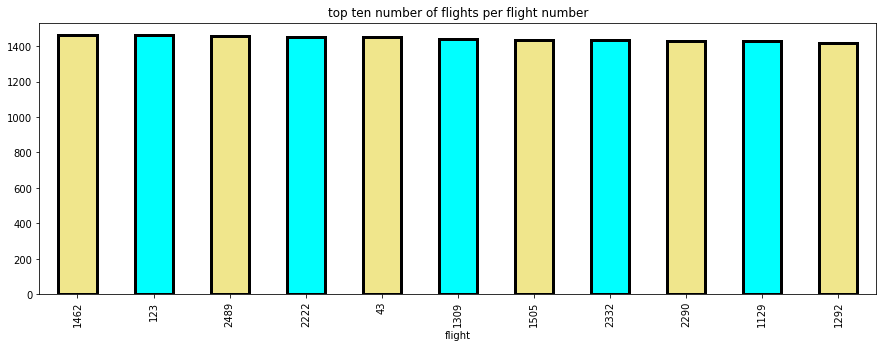

In [67]:
count_flight = flight_gb
print(type(count_flight))
count_flight_pd = count_flight.toPandas()
print(type(count_flight_pd))
count_flight_pd.loc[:10,].plot.bar(x="flight", y="count", color=['khaki', 'aqua'], figsize=(15,5),
                                   edgecolor='black', linewidth=3, 
                                   title='top ten number of flights per flight number', legend=False)
plt.show()



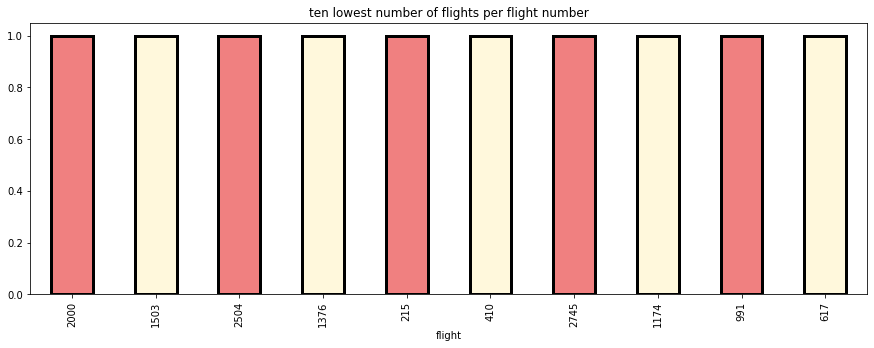

In [68]:
count_flight_pd.loc[len(count_flight_pd)-10:len(count_flight_pd), ].\
plot.bar(x="flight", y="count", color=['lightcoral', 'cornsilk'], figsize=(15,5),
         edgecolor='black', linewidth=3, 
         title='ten lowest number of flights per flight number', legend=False)
plt.show()

### Delay

In [ ]:
av_delay = spark.sql('SELECT avg(delay) AS average_delay FROM dep_parquet_table')
av_delay.show()

max_delay = spark.sql('SELECT MAX(delay) AS maximum_delay FROM dep_parquet_table')
max_delay.show()

min_delay = spark.sql('SELECT MIN(delay) AS minimum_delay FROM dep_parquet_table')
min_delay.show()

sum_duration = spark.sql('SELECT sum(delay) from dep_parquet_table').collect()[0]
print('The total delay time is: %d' % sum_duration)

+------------------+
|     average_delay|
+------------------+
|147.59399915712726|
+------------------+



In [ ]:
flight_delay = spark.sql("SELECT flight, AVG(delay) AS average_delay \
                         FROM dep_parquet_table GROUP BY flight ORDER BY average_delay DESC")

flight_delay.show(10)
print(type(flight_delay))

In [ ]:
flight_delay_pd = flight_delay.toPandas()
flight_delay_pd.loc[:10,].plot.bar(x='flight', y='average_delay', figsize=(15,5),
                                   edgecolor='black', linewidth=3,
                                   color=['indigo', 'lightseagreen'],
                                   title = "top ten flight numbers with highest average delay",
                                   legend=False)
plt.show()

In [ ]:
flight_delay_pd.loc[len(flight_delay_pd)-10 : len(flight_delay_pd),].\
plot.bar(x='flight', y='average_delay', figsize=(15,5),
         edgecolor='black', linewidth=3,
         color=['indigo', 'lightseagreen'],
         title = "ten lowest flight numbers with average delay",
         legend=False)
plt.show()

### destination

In [ ]:
dest_distinct = spark.sql('SELECT DISTINCT  dest FROM dep_parquet_table')

dest_distinct.show(5)
print(dest_distinct.count())

In [ ]:
dest_count = spark.sql('SELECT dest, COUNT(dest) as count FROM dep_parquet_table \
                       GROUP BY dest ORDER BY count DESC')

dest_count.show(10)
print(dest_count.count())
# Lax is the aiport with the most traffic

In [ ]:
dest_count_pd = dest_count.toPandas()
dest_count_pd.plot.bar(x='dest', y='count', figsize=(30,15),
                       edgecolor="black", linewidth='3', 
                       color=['lawngreen', 'crimson' , 'deepskyblue'],
                       title="Count of destinations indicating traffic at aiport",
                       legend=False)
plt.show()

## Adding a columns based on conditions

### How many delays are legally enforceable for compensation by the customer 

In [ ]:
# greater 50 minutes is legally enforceable by the passengers
legal_1 = \
allDep_spark_2.withColumn('legally_enforceable_delay', 
                          when(allDep_spark_2.delay > 50, 'legally_enforceable_delay')
                          .otherwise('not_legally_relevant'))

print(type(legal_1))
print(display(legal_1.show(3)))

In [ ]:
# greater 100 minutes then compensation is legally enforceable by the passengers
legal_2 = \
allDep_spark_2.withColumn('legally_enforceable', 
                          when(allDep_spark_2.delay > 100, 1)
                          .otherwise(0))

print(type(legal_2))
print(display(legal_2.show(3)))

In [ ]:
legal_2.createOrReplaceTempView("legal2")
print(spark_session.catalog.listTables())
# the parquet file is now registered

In [ ]:
legally_gb=spark.sql('SELECT legally_enforceable, COUNT(legally_enforceable) as count \
FROM legal2 GROUP BY legally_enforceable')
legally_gb.show()
print(type(legally_gb))

In [ ]:
legal_2_pd = legally_gb.toPandas()
print(legal_2_pd.info())

legal_2_pd.plot.bar(x='legally_enforceable', y='count', legend=False, edgecolor='red',
                    linewidth=4)
plt.show()

In [ ]:
print(legal_2_pd.head())


### Adding an Id column indentifying data records

<p>
Spark offers a function to generat monotonically increasing id's.   
This id's cannot be sequential.
On the contrary from the outside view the id's can occur quite abritary,
because with lazy evaluation those numbers are not actually generated till the transformations are conducted. As Spark is a distributed process the id's are createdwith regard to the partitions and not sequentially
like you would expect from a Pandas data frame. 
</p> 

In [ ]:
allDep_spark_2.count()

In [ ]:
allDep_spark_3 = \
allDep_spark_2.withColumn('ID_row', F.monotonically_increasing_id())

In [ ]:
allDep_spark_3.show(5)
# Here are the id's in line with the sequential expectation

In [ ]:
allDep_spark_3.orderBy(allDep_spark_3.ID_row.desc()).show(5)
# here is a jump in id row numbers

### Making distinct destinations ID's

In [ ]:
dest_distinct = allDep_spark_2.select('dest').distinct()
dest_distinct.show(5)
print(dest_distinct.rdd.getNumPartitions())

In [ ]:
dest_id = \
dest_distinct.withColumn('ID_destintations', 
                         F.monotonically_increasing_id())

In [ ]:
dest_id.show(5)

In [ ]:
dest_id.orderBy(dest_id.ID_destintations.desc()).show(5)

### Does the number of partitions influence the ID-variable?

In [ ]:
# making df's with different number of partions
# rdd.repartition(1)
allDep_repart1 = allDep_spark_2.rdd.repartition(1)
print(allDep_repart1)

print(allDep_repart1.getNumPartitions())
print(type(allDep_repart1))

df_repart1 = allDep_repart1.toDF()
print(type(df_repart1))
print(df_repart1.count())

In [ ]:
# making df's with different number of partions
# rdd.repartition(20) needs more processing time than rdd.repartition(20)
allDep_repart20 = allDep_spark_2.rdd.repartition(20)
print(allDep_repart20)

print(allDep_repart20.getNumPartitions())
print(type(allDep_repart20))

df_repart20 = allDep_repart20.toDF()
print(type(df_repart20))
print(df_repart20.count())

In [ ]:
# Add ID columns
dest_id_1 = \
df_repart1.select('dest').distinct().\
withColumn('ID', F.monotonically_increasing_id())

dest_id_1.orderBy(dest_id_1.ID).show(10)
dest_id_1_max = dest_id_1.select('ID').rdd.max()[0]
print(dest_id_1_max)

In [ ]:
dest_id_20 = \
df_repart20.select('dest').distinct().\
withColumn('ID', F.monotonically_increasing_id())

dest_id_20.orderBy(dest_id_20.ID).show(5)


In [ ]:
dest_id_20_max = dest_id_20.select('ID').rdd.max()[0]
print(dest_id_20_max)

### Handing over max ID from one df as start ID to the next

In [ ]:
# print(allDep_spark_2.columns)
# create a subset df

df_LAX = allDep_spark_2.filter(F.col('dest')=='LAX')
df_LAX = df_LAX.withColumn('ID', F.monotonically_increasing_id())

print(df_LAX.count())


In [ ]:
# determine max ID
df_LAX_max = df_LAX.select('ID').rdd.max()[0]
print(df_LAX_max)

In [ ]:
# create another subset
df_ORF = allDep_spark_2.filter(F.col('dest')=='ORF')

# make the max id value of LAX the start id of ORF
df_ORF = \
df_ORF.withColumn('ID', F.monotonically_increasing_id()+df_LAX_max )
# determine the max ID of this df
df_ORF_max = df_ORF.select('ID').rdd.max()[0]

print(df_ORF.count())
print(df_ORF.columns)

In [ ]:
print(df_LAX_max)
print(df_ORF_max)

print(df_LAX.select('ID').show(5))
print(df_ORF.select('ID').show(5))


# Special techniques for cleaning and improving performance

## Caching

<p>
refers in Spark to the task of storing data in memory, preferable the quick accessible Solid-state drive (SSD). This improves speed of operation as the data must not be retrieved from the nodes of the Spark cluster. Of course very large data sets may not fit into memory. This is one reason to set up a Spark cluster in the first place. Caching needs coding and the effort of coding and controlling might not be justified by performance increase every time. Monitoring of performance gains through caching is recommended. 
</p>

<p>
Cache is a Spark transformation only executed when an action is called.
</p>

In [ ]:
# measuring performance with time
print ("time.time(): %f " %  time.time())
print (time.localtime( time.time() ))
print (time.asctime( time.localtime(time.time()) ))

In [ ]:
# print(type(allDep_spark_2))
# print(allDep_spark_2.columns)
# print(allDep_spark_2.show())

# assigning time to start time
start_time = time.time()
print("Counting %d rows took %f seconds" % \
     (allDep_spark_2.distinct().count(), time.time() - start_time))


# Count the rows again, noting the variance in time of a cached DataFrame
allDep_cached = allDep_spark_2.distinct().cache()
start_time = time.time()
print("Counting %d rows again took %f seconds" % \
      (allDep_cached.count(), time.time() - start_time))

The cached version took less time than the other version.<br>
The is_cached method allows to check if an object is cached.

In [ ]:
print("Is the allDep_cached data frame cached?: %s" % \
      allDep_cached.is_cached)

In [ ]:
# Removing departures_df from cache
# with unpersist
allDep_cacheReversed = allDep_cached.unpersist()

print("Is the allDep_cacheReversed data frame cached?: %s" % \
      allDep_cacheReversed.is_cached)

### Loading data files as full and split files

In [ ]:
# Import the full and split files into DataFrames
full_df = spark.read.csv('data_sets/depart_concat.csv')
split_df = spark.read.csv('data_sets/AA_DFW_****_Departures_Short.csv')


In [ ]:
start_time_4 = time.time()
print("count: %i" % full_df.count())
print("run time: %f" % (time.time() - start_time_4))


In [ ]:
start_time_5 = time.time()
print("count: %i" % split_df.count())
print("run time: %f" % (time.time() - start_time_5))


## Shuffling

<p>
is a side effect of redistributing data between workers by the Spark. While executing the algorithm it will be necessary to shift data around 
to do certain tasks. It is irrelevant to know,
which data is processed by which node, as long as it processed. 
However too much shuffling can create bottlenecks and lower data throughput time. Reducing shuffling can increase performance. Instead
of relying on the Spark algorithm to figure out redistribution operations like broadcasting are giving nodes specified copies of data.
</p> 


<p>
The execution plan "df.explain" gives insights about how 
the Spark commands the redistribution is actually carried out and
can determine operations like broadcasting.

</p> 

In [ ]:
flights = \
spark.read.csv(path='data_sets/flights_small.csv', sep=',', 
               encoding='UTF-8', header=True, inferSchema=True)

In [ ]:
airports = \
spark.read.csv(path='data_sets/airports.csv', sep=',', 
               encoding='UTF-8', header=True, inferSchema=True)

In [ ]:
print(flights.count())
print(len(flights.columns))

flights.printSchema()

In [ ]:
flights.select('dest').show(3)

In [ ]:
airports.printSchema()

In [ ]:
airports.show(5)

In [ ]:
allDep_spark.printSchema()
print(len(allDep_spark.columns))

In [ ]:
allDep_spark.select('Destination Airport').show(3)

In [ ]:
airFlight_join = \
flights.join(allDep_spark,
             allDep_spark['Destination Airport'] == flights['dest'])

print(len(airFlight_join.columns))
print(airFlight_join.select('dest').show(5))
airFlight_join.explain()
# it does allready a broadcast without explicitly commanding this

In [ ]:
airFlight_broadcast = \
flights.join(broadcast(allDep_spark),
             allDep_spark['Destination Airport'] == flights['dest'])

print(len(airFlight_broadcast.columns))
airFlight_broadcast.explain()

Measuring the time difference between with and without broadcasting.

In [ ]:
start_time_1 = time.time()
print(start_time)
# do an operation whichever initiates laz evaluation
airFlight_n = airFlight_join.count()
duration_1 = time.time() - start_time_1
print(duration_1)

In [ ]:
start_time_2 = time.time()
broadcast_n = airFlight_broadcast.count()
duration_2 = time.time() - start_time_2
print(duration_2)

In [ ]:
# f"Hello, {name}. You are {age}."
print(f"count airFlight_n: {airFlight_n}, processing time: {duration_1}")
print(f"count broadcast_n: {broadcast_n}, processing time: {duration_2}")

On small DataFrames, it may be better skip broadcasting and let Spark figure out any optimization. 

## Data pipelines 

<p>
(in Spark) processing data from the source (e.g. csv, jsons, html, databases, web services ...) to the outputs. Between inputs and outputs the data is transformed (e.g. withColum, filter, drop, ...) and then stored as files in formats like CSV, Parquet, or a database.
In a process of validation the data is then tested for consistency with 
expectations. Afterwards the data is ready for analysis (e.g. exploration, aggregation ...).
</p> 

<p>
Packages like Spark.ML or scikit.learn have implemented data the concept of data pipelines as special objects allowing for a structured, powerful
workflow.
</p> 

<p>
Below there is a simple example of multistep data pipeline.
</p> 


In [ ]:
# Step 1: load data
depart17 = \
spark.read.format('csv').load('data_sets\AA_DFW_2017_Departures_Short.csv',
                              header=True)
# header must be set to true, otherwise spark produces aliases like _c0

depart17.printSchema()

In [ ]:
# Step 2: rename the columns
depart171 = \
depart17.withColumnRenamed('Flight Number', 'flight_n').\
withColumnRenamed('Date (MM/DD/YYYY)', 'date').\
withColumnRenamed('Destination Airport', 'dest').\
withColumnRenamed('Actual elapsed time (Minutes)', 'time')

In [ ]:
depart171.printSchema()

In [ ]:
depart171.show(3)

In [ ]:
# Step 3: change data type of time variable
depart172 = \
depart171.withColumn("time_elapsed", depart171.time.cast("integer")).\
drop('time')

In [ ]:
depart172.printSchema()

In [ ]:
depart172.show(4)

In [ ]:
# Step 4: filter the data frame by time greater 0
depart172_0 = depart172.filter(depart172[3] > 0)

In [ ]:
# Step 5: add an id colum to the data frame
# this makes row operations easier of course
depart172_id = \
depart172_0.withColumn('id', F.monotonically_increasing_id())
depart172_id = depart172_id.select('id', 'date', 'flight_n', 'dest',
                                   'time_elapsed')

In [ ]:
depart172_id.show(5)

In [ ]:
#Step 6: write it down as a json
depart172_id.write.json('data_sets\depart_json.json', mode='overwrite')

In [ ]:
# #Step 6:order by
depart172_id.orderBy('time_elapsed').show(5)

## Removing comments

In [ ]:
# Count the number of rows beginning with '#'
comment_count = \
depart172_id.where(col('flight_n').startswith('#')).count()
comment_count
# in the column flight_n there are not any comments

In [ ]:
# I have written some comments into the raw data
# and reading the commented data now in 

commentSchema = StructType([
    # Define the date field
    StructField('date', StringType(), True),
    # Add the title field
    StructField('flight', StringType(), True),
    # Add the voter field
    StructField('dest', StringType(), True),
    StructField('time', IntegerType(), True) 
    ])   

commentDF = spark.read.csv('data_sets\comments_1.csv', 
                     header=True, schema=commentSchema, quote="\"")

In [ ]:
print(commentDF.printSchema())
print(commentDF.show(10, truncate = False))
print(commentDF.count())

In [ ]:
# Count the number of rows beginning with '#'
commentDF_count = \
commentDF.where(col('date').startswith('#')).count()
commentDF_count
# there are 6 comments in the data

In [ ]:
withoutCommentDF = spark.read.csv('data_sets\comments_1.csv',
                                  comment='#',
                                  header=True, schema=commentSchema)

print(withoutCommentDF.show(10))

In [ ]:
# Are there any comments?
withoutCommentDF.where(col('date').startswith('#')).count()
# Comments are 0

In [ ]:
tmp_fields = F.split(withoutCommentDF['date'], '\t')

In [ ]:
tmp_fields

In [ ]:
# Create the colcount column on the DataFrame
withoutCommentDF_2 = \
withoutCommentDF.withColumn('colcount', F.size(tmp_fields))
withoutCommentDF_2.show(3)

# Joining


<p>
"Spark SQL supports all basic join operations available in traditional SQL, though Spark Core Joins has huge performance issues when not designed with care as it involves data shuffling across the network, In the other hand Spark SQL Joins comes with more optimization by default (thanks to DataFrames & Dataset) however still there would be some performance issues to consider while using."
</p> 
<a href="https://sparkbyexamples.com/spark/spark-sql-dataframe-join/" target="_blank">
Spark by {Examples}
</a>



In [ ]:
# Is there a primary key to join on?
# airports.printSchema()
# allDep_spark_2.printSchema()
# flights.printSchema()
# airports.show(10)

In [ ]:
print(allDep_spark_2.select('dest').show(5))
print(airports.select('faa').show(5))
print(flights.select('origin').show(5))

The airport abbreviations are working as a key.

Shapes

In [ ]:
print(airports.count())
print(allDep_spark_2.count())
print(flights.count())

In [ ]:
print(len(airports.columns))
print(len(airports.columns))
print(len(flights.columns))

### Inner Join

"Inner join is the default join in Spark and it’s mostly used, 
this joins two datasets on key columns and where keys don’t match 
the rows get dropped from both datasets (emp & dept)."" 

In [ ]:
depAirport_join = \
allDep_spark_2.join(F.broadcast(airports),
                    airports.faa == allDep_spark_2.dest)

print(depAirport_join.count())
print(len(depAirport_join.columns))
depAirport_join.printSchema()

In [ ]:

depFlight_join = \
allDep_spark_2.join(F.broadcast(flights),
                    flights.origin == allDep_spark_2.dest)

print(depFlight_join.count())
print(len(depFlight_join.columns))
# depFlight_join.printSchema()
# print(depFlight_join.show(5))

### Left, Leftouter Join

Left a.k.a Leftouter join returns all rows from the left dataset regardless of match found on the right dataset when join expression doesn’t match, it assigns null for that record and drops records from right where match not found. 

In [ ]:
depFlight_leftjoin = \
allDep_spark_2.join(F.broadcast(flights),
                    flights.origin == allDep_spark_2.dest, 'left')

print(depFlight_leftjoin.count())
print(len(depFlight_leftjoin.columns))

In [ ]:
depAirport_leftjoin = \
allDep_spark_2.join(F.broadcast(airports),
                    airports.faa == allDep_spark_2.dest, 'left')

print(depAirport_leftjoin.count())
print(len(depAirport_leftjoin.columns))

### Left Anti Join

"leftanti join does the exact opposite of the leftsemi, leftanti join returns only columns from the left dataset for non-matched records.""

In [ ]:
depFlight_antijoin = \
allDep_spark_2.join(F.broadcast(flights),
                    flights.origin == allDep_spark_2.dest, 'left_anti')

print(depFlight_antijoin.count())
print(depFlight_antijoin.columns)
# depFlight_antijoin.printSchema()
# depFlight_antijoin.show(5))

In [ ]:
depAirport_antijoin = \
allDep_spark_2.join(F.broadcast(airports),
                    airports.faa == allDep_spark_2.dest, 'left_anti')

print(depAirport_antijoin.count())
print(len(depAirport_antijoin.columns))